In [1]:
import pandas as pd

from sprime_mapping import map_sprime_segments
from sprime_info import compute_sprime_info

from sprime_mapping_extended import *
from sprime_plotting import *

from utils_bed import *
from bed_plotting import *

In [2]:
prefix = "frag_"

In [3]:
# these two files are necessary: score_file with SPrime output and original vcf_file output
vcf_file = "merged_no_missing_gt.vcf.gz"
score_file = "sprime_output.score"


In [4]:
# for getting only the introgressed tracts in the target individuals, we also have to provide a list with the individual names (have to correspond to the vcf-file) we are interested in
# if not provided, for all individuals in the vcf-file the introgression status is checked (including reference individuals etc. - this is usually not desired / reasonable, but perhaps one want to check)
tgt_individuals_file = "papuans.tids"

In [5]:
# if we ant to write the file, also an out_file has to be scpecified
#out_file_wo_filtering = prefix + "archie.0.sprime.100000.inferred_wo_filtering.bed"
#out_file_every_snp = prefix + "archie.0.sprime.100000.inferred_every_snp.bed"
#out_file_frac_50 = prefix + "archie.0.sprime.100000.inferred_fraction_050.bed"
#out_file_frac_100 = "archie.0.sprime.100000.inferred_fraction_100.bed"

output_file = prefix + "papuans_tgt.bed"



In [6]:
# open file with tgt individuals

In [7]:
with open(tgt_individuals_file) as f:
    tgt_individuals = [line.strip() for line in f if line.strip()]


In [8]:
tgt_individuals

['LP6005441-DNA_A10',
 'LP6005441-DNA_B10',
 'LP6005443-DNA_A08',
 'LP6005443-DNA_B08',
 'LP6005443-DNA_C07',
 'LP6005443-DNA_C08',
 'LP6005443-DNA_D07',
 'LP6005443-DNA_D08',
 'LP6005443-DNA_E07',
 'LP6005443-DNA_E08',
 'LP6005443-DNA_F07',
 'LP6005443-DNA_F08',
 'LP6005443-DNA_G07',
 'LP6005443-DNA_H07',
 'SS6004472',
 'PNG_WGS_set3_1',
 'PNG_WGS_set3_10',
 'PNG_WGS_set3_11',
 'PNG_WGS_set3_12',
 'PNG_WGS_set3_13',
 'PNG_WGS_set3_14',
 'PNG_WGS_set3_15',
 'PNG_WGS_set3_16',
 'PNG_WGS_set3_17',
 'PNG_WGS_set3_18',
 'PNG_WGS_set3_19',
 'PNG_WGS_set3_2',
 'PNG_WGS_set3_20',
 'PNG_WGS_set3_21',
 'PNG_WGS_set3_22',
 'PNG_WGS_set3_23',
 'PNG_WGS_set3_24',
 'PNG_WGS_set3_25',
 'PNG_WGS_set3_26',
 'PNG_WGS_set3_27',
 'PNG_WGS_set3_28',
 'PNG_WGS_set3_29',
 'PNG_WGS_set3_3',
 'PNG_WGS_set3_30',
 'PNG_WGS_set3_31',
 'PNG_WGS_set3_32',
 'PNG_WGS_set3_33',
 'PNG_WGS_set3_34',
 'PNG_WGS_set3_35',
 'PNG_WGS_set3_36',
 'PNG_WGS_set3_37',
 'PNG_WGS_set3_38',
 'PNG_WGS_set3_39',
 'PNG_WGS_set3_4',
 '

In [9]:
len(tgt_individuals)

178

### Let's also check the sprime output file

In [10]:
df = pd.read_csv(score_file, sep="\t")

# Count the number of SNPs per SEGMENT
snp_counts = df['SEGMENT'].value_counts()

snp_counts_df = snp_counts.reset_index()
snp_counts_df.columns = ['SEGMENT', 'SNP_COUNT']

print(snp_counts_df)
print(snp_counts_df["SNP_COUNT"].sum())

      SEGMENT  SNP_COUNT
0         531        847
1         176        812
2         456        791
3         440        709
4         809        688
...       ...        ...
1239      802         16
1240      754         15
1241     1197         14
1242      253         14
1243     1085         12

[1244 rows x 2 columns]
126053


In [11]:
score_file


'sprime_output.score'

In [12]:
df

,CHROM,POS,ID,REF,ALT,SEGMENT,ALLELE,SCORE
0,1,809520,rs373536385,G,A,69,1,127483
1,1,818101,rs369081386,G,A,69,1,127483
2,1,818991,.,T,C,69,1,127483
3,1,829486,rs376277944,A,G,69,1,127483
4,1,830444,rs373008351,G,A,69,1,127483
...,...,...,...,...,...,...,...,...
126048,22,50929587,.,G,A,1225,1,169102
126049,22,50930974,.,T,C,1225,1,169102
126050,22,50930990,.,C,T,1225,1,169102
126051,22,50931192,.,C,T,1225,1,169102


In [13]:
runinfo = map_sprime_segments_within_segment_structure(
    score_file,
    vcf_file,
    target_individuals=tgt_individuals,
    phased=True,
)

In [14]:
runinfo

,chrom,segment,individual,haplotype,n_snps,n_introgressed,introgressed_fraction,segment_snps,introgressed_flags,run_lengths_snps,...,gap_lengths_bps,mean_run_snps,var_run_snps,mean_run_bps,var_run_bps,mean_gap_snps,var_gap_snps,mean_gap_bps,var_gap_bps,uninformative_snps
0,1,69,LP6005441-DNA_B10,1,33,0,0.000000,"[809520, 818101, 818991, 829486, 830444, 83352...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],...,[84601],0.0,0.00,0.0,0.0,33.0,0.000000,84601.0,0.000000e+00,"[809698, 809876, 809927, 810286, 810780, 81123..."
1,1,69,LP6005441-DNA_B10,2,33,9,0.272727,"[809520, 818101, 818991, 829486, 830444, 83352...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",[9],...,[48497],9.0,0.00,30116.0,0.0,24.0,0.000000,48497.0,0.000000e+00,"[809698, 809876, 809927, 810286, 810780, 81123..."
2,1,69,LP6005443-DNA_G07,1,33,6,0.181818,"[809520, 818101, 818991, 829486, 830444, 83352...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",[6],...,"[9471, 48497]",6.0,0.00,10150.0,0.0,13.5,110.250000,28984.0,3.807572e+08,"[809698, 809876, 809927, 810286, 810780, 81123..."
3,1,69,LP6005443-DNA_G07,2,33,33,1.000000,"[809520, 818101, 818991, 829486, 830444, 83352...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[33],...,[],33.0,0.00,84601.0,0.0,0.0,0.000000,0.0,0.000000e+00,"[809698, 809876, 809927, 810286, 810780, 81123..."
4,1,69,PNG_WGS_set3_18,1,33,0,0.000000,"[809520, 818101, 818991, 829486, 830444, 83352...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],...,[84601],0.0,0.00,0.0,0.0,33.0,0.000000,84601.0,0.000000e+00,"[809698, 809876, 809927, 810286, 810780, 81123..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122283,22,1225,PNG_WGS_set5_71,2,69,3,0.043478,"[50725350, 50731151, 50732386, 50734387, 50739...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2]",...,"[198287, 0, 1858]",1.5,0.25,8.0,64.0,22.0,840.666667,66715.0,8.656171e+09,"[50725516, 50725553, 50725968, 50726627, 50727..."
122284,22,1225,PNG_WGS_set3_36,1,69,0,0.000000,"[50725350, 50731151, 50732386, 50734387, 50739...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],...,[207700],0.0,0.00,0.0,0.0,69.0,0.000000,207700.0,0.000000e+00,"[50725516, 50725553, 50725968, 50726627, 50727..."
122285,22,1225,PNG_WGS_set3_36,2,69,5,0.072464,"[50725350, 50731151, 50732386, 50734387, 50739...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[5],...,[204095],5.0,0.00,3463.0,0.0,64.0,0.000000,204095.0,0.000000e+00,"[50725516, 50725553, 50725968, 50726627, 50727..."
122286,22,1225,PNG_WGS_set3_4,1,69,0,0.000000,"[50725350, 50731151, 50732386, 50734387, 50739...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],...,[207700],0.0,0.00,0.0,0.0,69.0,0.000000,207700.0,0.000000e+00,"[50725516, 50725553, 50725968, 50726627, 50727..."


In [15]:
runinfo_postprocessed_full = fragments_from_segment_structure_with_metadata(
    runinfo,
    min_snps=5,
    max_gap=1,
)

In [16]:
runinfo_postprocessed_full

,chrom,segment,individual,haplotype,n_snps,n_introgressed,introgressed_fraction,segment_snps,introgressed_flags,uninformative_snps,start,end,nsnps,fragment_positions
0,1,69,LP6005441-DNA_B10,2,33,9,0.272727,"[809520, 818101, 818991, 829486, 830444, 83352...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[809698, 809876, 809927, 810286, 810780, 81123...",809520,839637,9,"[809520, 818101, 818991, 829486, 830444, 83352..."
1,1,69,LP6005443-DNA_G07,1,33,6,0.181818,"[809520, 818101, 818991, 829486, 830444, 83352...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[809698, 809876, 809927, 810286, 810780, 81123...",829486,839637,6,"[829486, 830444, 833529, 835831, 837238, 839636]"
2,1,69,LP6005443-DNA_G07,2,33,33,1.000000,"[809520, 818101, 818991, 829486, 830444, 83352...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[809698, 809876, 809927, 810286, 810780, 81123...",809520,894122,33,"[809520, 818101, 818991, 829486, 830444, 83352..."
3,1,69,PNG_WGS_set3_18,2,33,9,0.272727,"[809520, 818101, 818991, 829486, 830444, 83352...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[809698, 809876, 809927, 810286, 810780, 81123...",809520,839637,9,"[809520, 818101, 818991, 829486, 830444, 83352..."
4,1,69,PNG_WGS_set3_19,2,33,9,0.272727,"[809520, 818101, 818991, 829486, 830444, 83352...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[809698, 809876, 809927, 810286, 810780, 81123...",809520,839637,9,"[809520, 818101, 818991, 829486, 830444, 83352..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103585,22,1225,PNG_WGS_set5_49,2,69,6,0.086957,"[50725350, 50731151, 50732386, 50734387, 50739...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[50725516, 50725553, 50725968, 50726627, 50727...",50929445,50933051,6,"[50929445, 50929587, 50930974, 50930990, 50931..."
103586,22,1225,PNG_WGS_set5_61,2,69,6,0.086957,"[50725350, 50731151, 50732386, 50734387, 50739...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[50725516, 50725553, 50725968, 50726627, 50727...",50929445,50933051,6,"[50929445, 50929587, 50930974, 50930990, 50931..."
103587,22,1225,PNG_WGS_set5_64,1,69,6,0.086957,"[50725350, 50731151, 50732386, 50734387, 50739...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[50725516, 50725553, 50725968, 50726627, 50727...",50929445,50933051,6,"[50929445, 50929587, 50930974, 50930990, 50931..."
103588,22,1225,PNG_WGS_set5_64,2,69,6,0.086957,"[50725350, 50731151, 50732386, 50734387, 50739...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[50725516, 50725553, 50725968, 50726627, 50727...",50929445,50933051,6,"[50929445, 50929587, 50930974, 50930990, 50931..."


In [17]:
#true_tracts_file = "archie.1.true.tracts.bed"
#true_tracts_bed = pd.read_csv(true_tracts_file, sep="\t", names=["chromosome", "start", "end", "individual_haplotype"])

In [18]:
fragments_to_bed(runinfo_postprocessed_full, bed_file=output_file)

,chrom,start,end,individual_haplotype
0,1,809520,839637,LP6005441-DNA_B10_2
3,1,809520,839637,PNG_WGS_set3_18_2
4,1,809520,839637,PNG_WGS_set3_19_2
5,1,809520,839637,PNG_WGS_set3_25_2
6,1,809520,839637,PNG_WGS_set3_29_2
...,...,...,...,...
54274,9,139261645,139388582,PNG_WGS_set5_19_2
54275,9,139261645,139388582,PNG_WGS_set5_23_2
54276,9,139541179,139562564,PNG_WGS_set5_28_2
54277,9,139541179,139606381,PNG_WGS_set5_79_2


In [19]:
bed_df = pd.read_csv(output_file, sep="\t", names=["chrom", "start", "end", "individual_haplotype"])

In [20]:
sum_dicts = summarize_bed(bed_df, output_prefix="fragments_papuans_all_5_1_summary")

CSV files saved with prefix 'fragments_papuans_all_5_1_summary'


In [21]:
sum_dicts.keys()

dict_keys(['haplotype', 'individual', 'haplotype_chrom', 'individual_chrom', 'chromosome', 'haplotype_across_chrom', 'individual_across_chrom'])

In [22]:
sum_dicts["individual"]

,individual,num_fragments,avg_length
0,LP6005441-DNA_A10,627,132989.095694
1,LP6005441-DNA_B10,601,125845.610649
2,LP6005443-DNA_A08,595,121087.717647
3,LP6005443-DNA_B08,585,112318.220513
4,LP6005443-DNA_C07,563,119833.069272
...,...,...,...
173,PNG_WGS_set5_80,600,117267.113333
174,PNG_WGS_set5_81,567,122726.858907
175,PNG_WGS_set5_82,610,114166.757377
176,PNG_WGS_set5_9,588,115763.872449


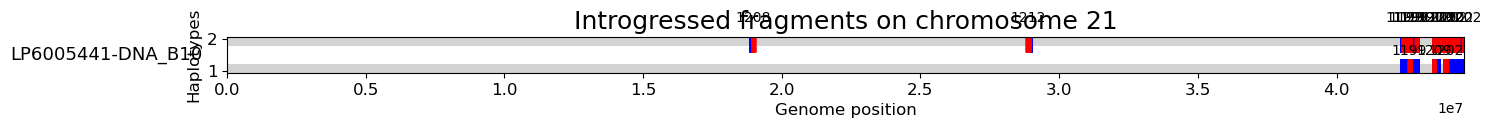

In [23]:
plot_introgression_fragments(runinfo_postprocessed_full, chromosome=21, individuals_to_plot=['LP6005441-DNA_B10'], plot_uninformative_snps=False, true_tracts_bed=None, segments_to_plot=None)

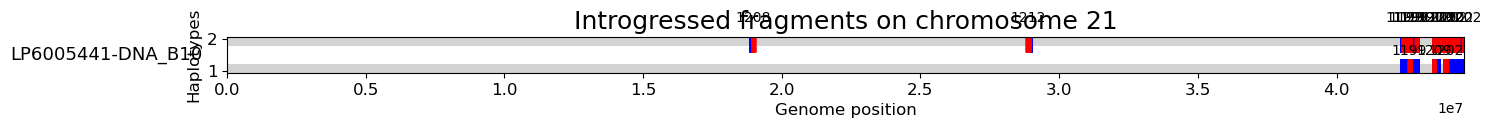

In [24]:
plot_introgression_fragments(runinfo_postprocessed_full, chromosome=21, individuals_to_plot=['LP6005441-DNA_B10'], plot_uninformative_snps=False, true_tracts_bed=None, segments_to_plot=None)

In [25]:
bed_df

,chrom,start,end,individual_haplotype,fragment_length,individual
0,1,809520,839637,LP6005441-DNA_B10_2,30117,LP6005441-DNA_B10
1,1,809520,839637,PNG_WGS_set3_18_2,30117,PNG_WGS_set3_18
2,1,809520,839637,PNG_WGS_set3_19_2,30117,PNG_WGS_set3_19
3,1,809520,839637,PNG_WGS_set3_25_2,30117,PNG_WGS_set3_25
4,1,809520,839637,PNG_WGS_set3_29_2,30117,PNG_WGS_set3_29
...,...,...,...,...,...,...
103585,9,139261645,139388582,PNG_WGS_set5_19_2,126937,PNG_WGS_set5_19
103586,9,139261645,139388582,PNG_WGS_set5_23_2,126937,PNG_WGS_set5_23
103587,9,139541179,139562564,PNG_WGS_set5_28_2,21385,PNG_WGS_set5_28
103588,9,139541179,139606381,PNG_WGS_set5_79_2,65202,PNG_WGS_set5_79


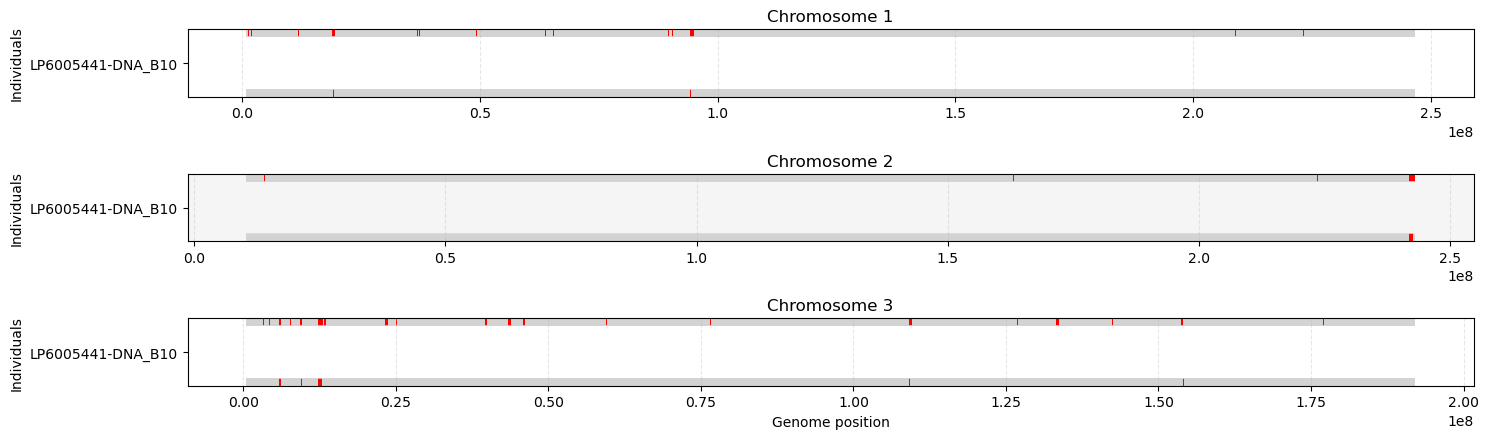

In [26]:
plot_introgression_bed_genome_subplots(bed_df, chromosomes=[1, 2, 3], individuals_to_plot=['LP6005441-DNA_B10'])

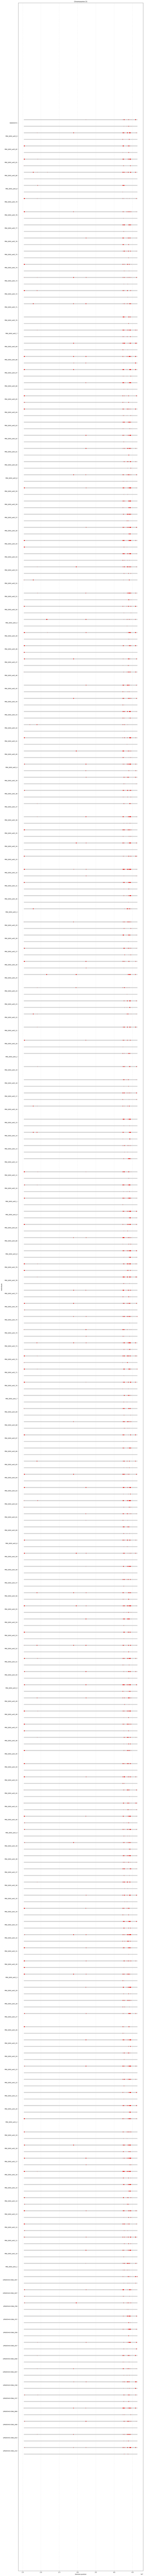

In [27]:
plot_introgression_bed_genome_subplots(bed_df, chromosomes=[21])

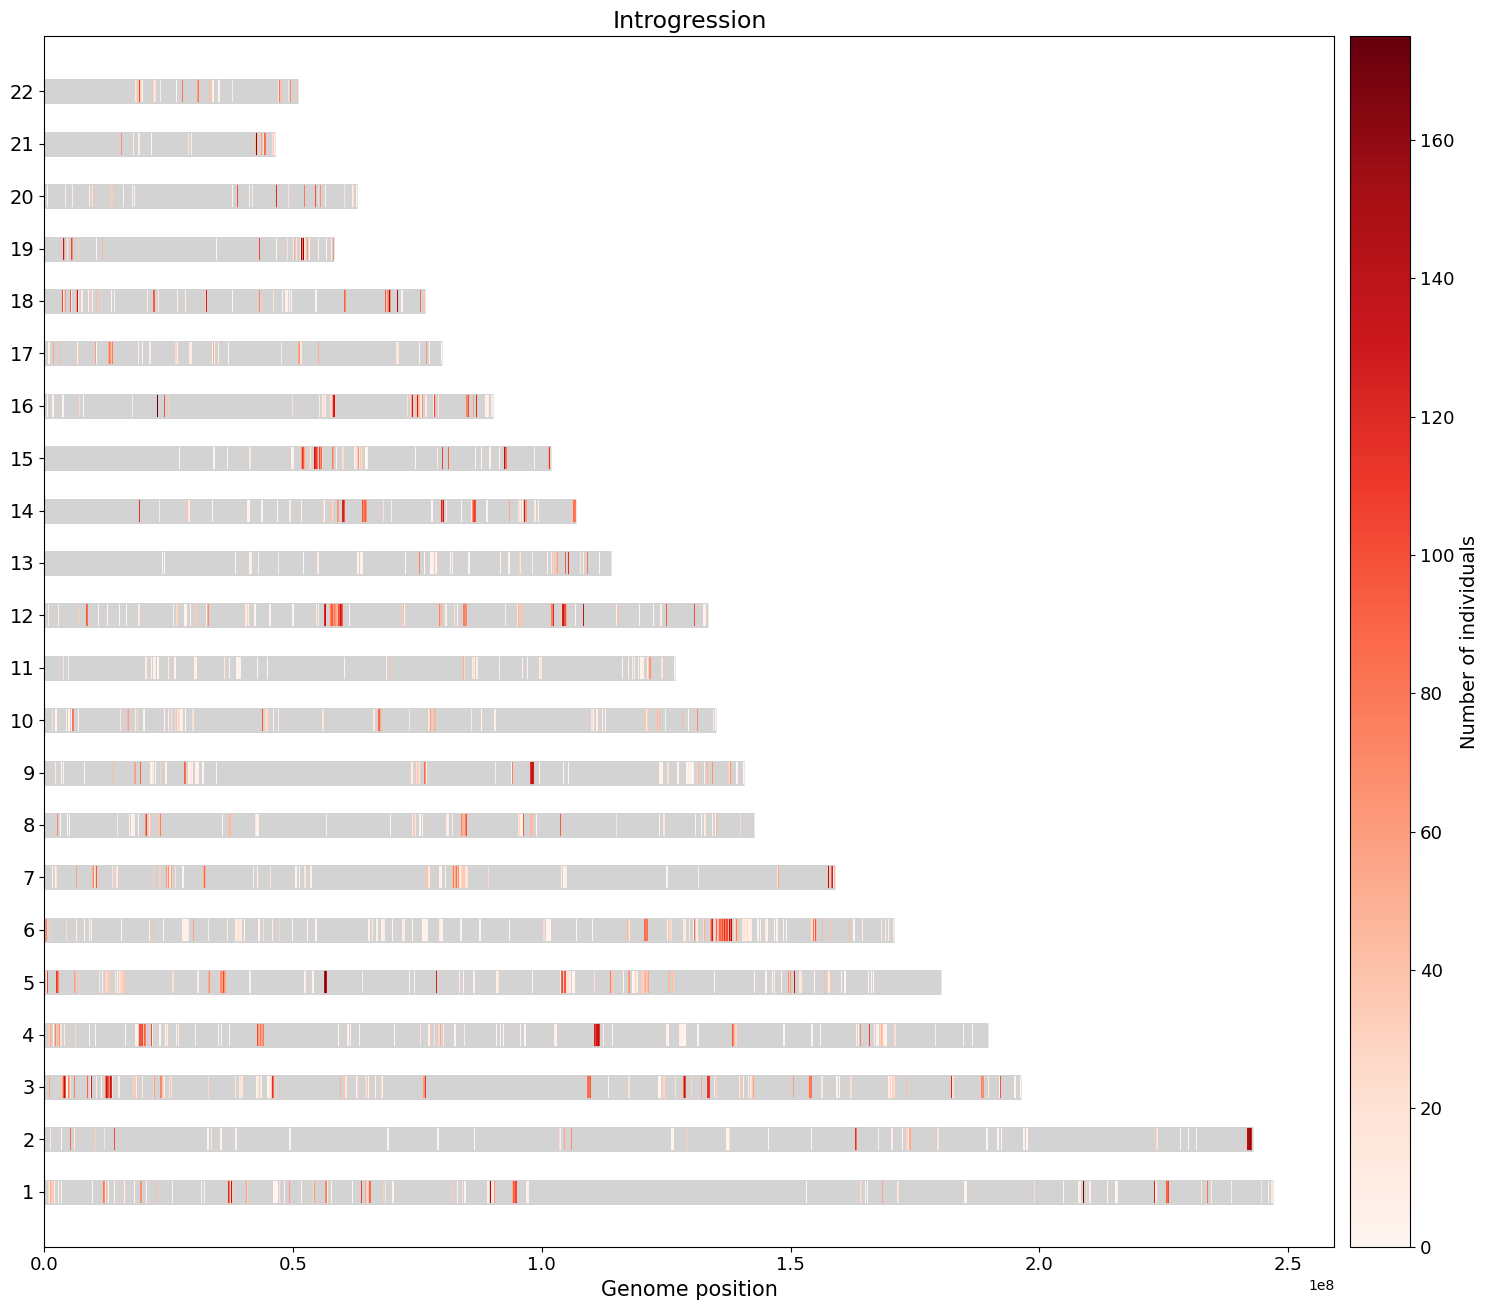

In [28]:
plot_introgression_support_exact(
    bed_df,
    chromosomes=None,
    count_mode="individual",  # "haplotype" or "individual"
    cmap="Reds",
    backbone_linewidth=18,
    vcf_file=vcf_file,
    #title="SPrime results per chromosome"
)

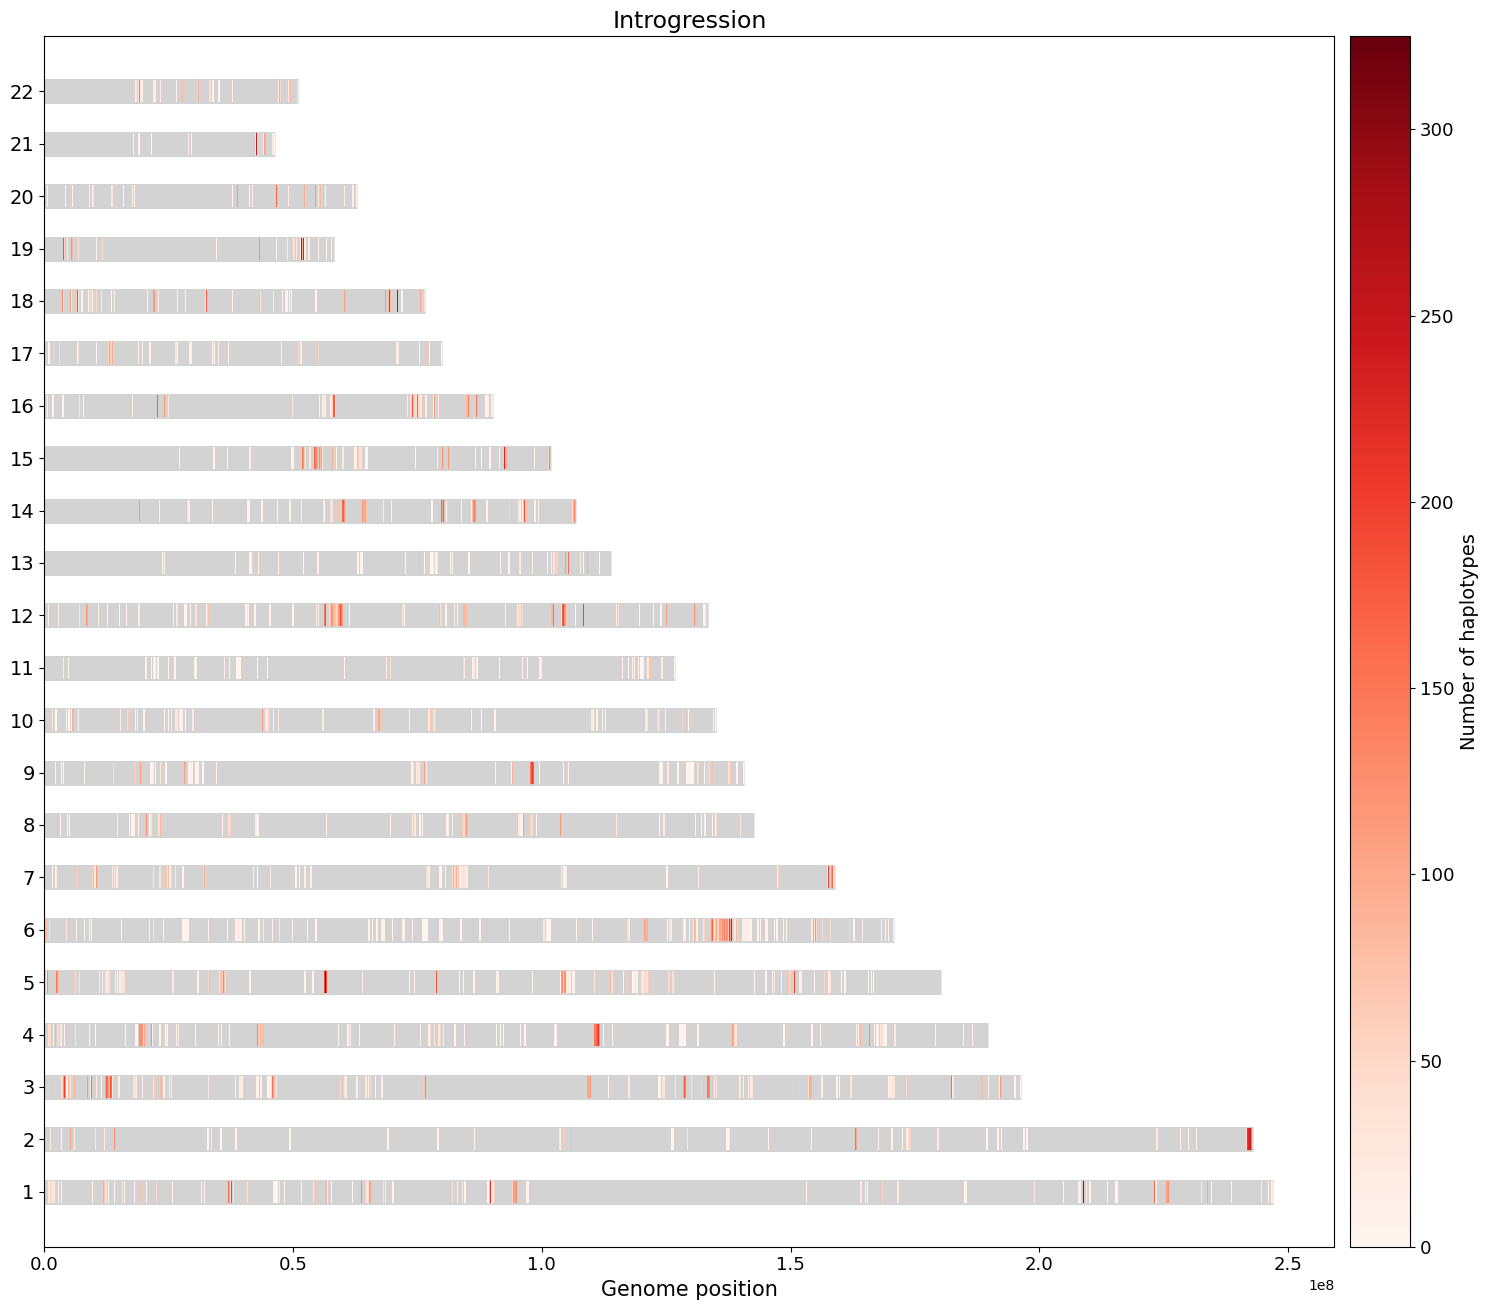

In [29]:
plot_introgression_support_exact(
    bed_df,
    chromosomes=None,
    count_mode="haplotype",  # "haplotype" or "individual"
    cmap="Reds",
    backbone_linewidth=18,
    vcf_file=vcf_file,
    #title="SPrime results per chromosome"
)

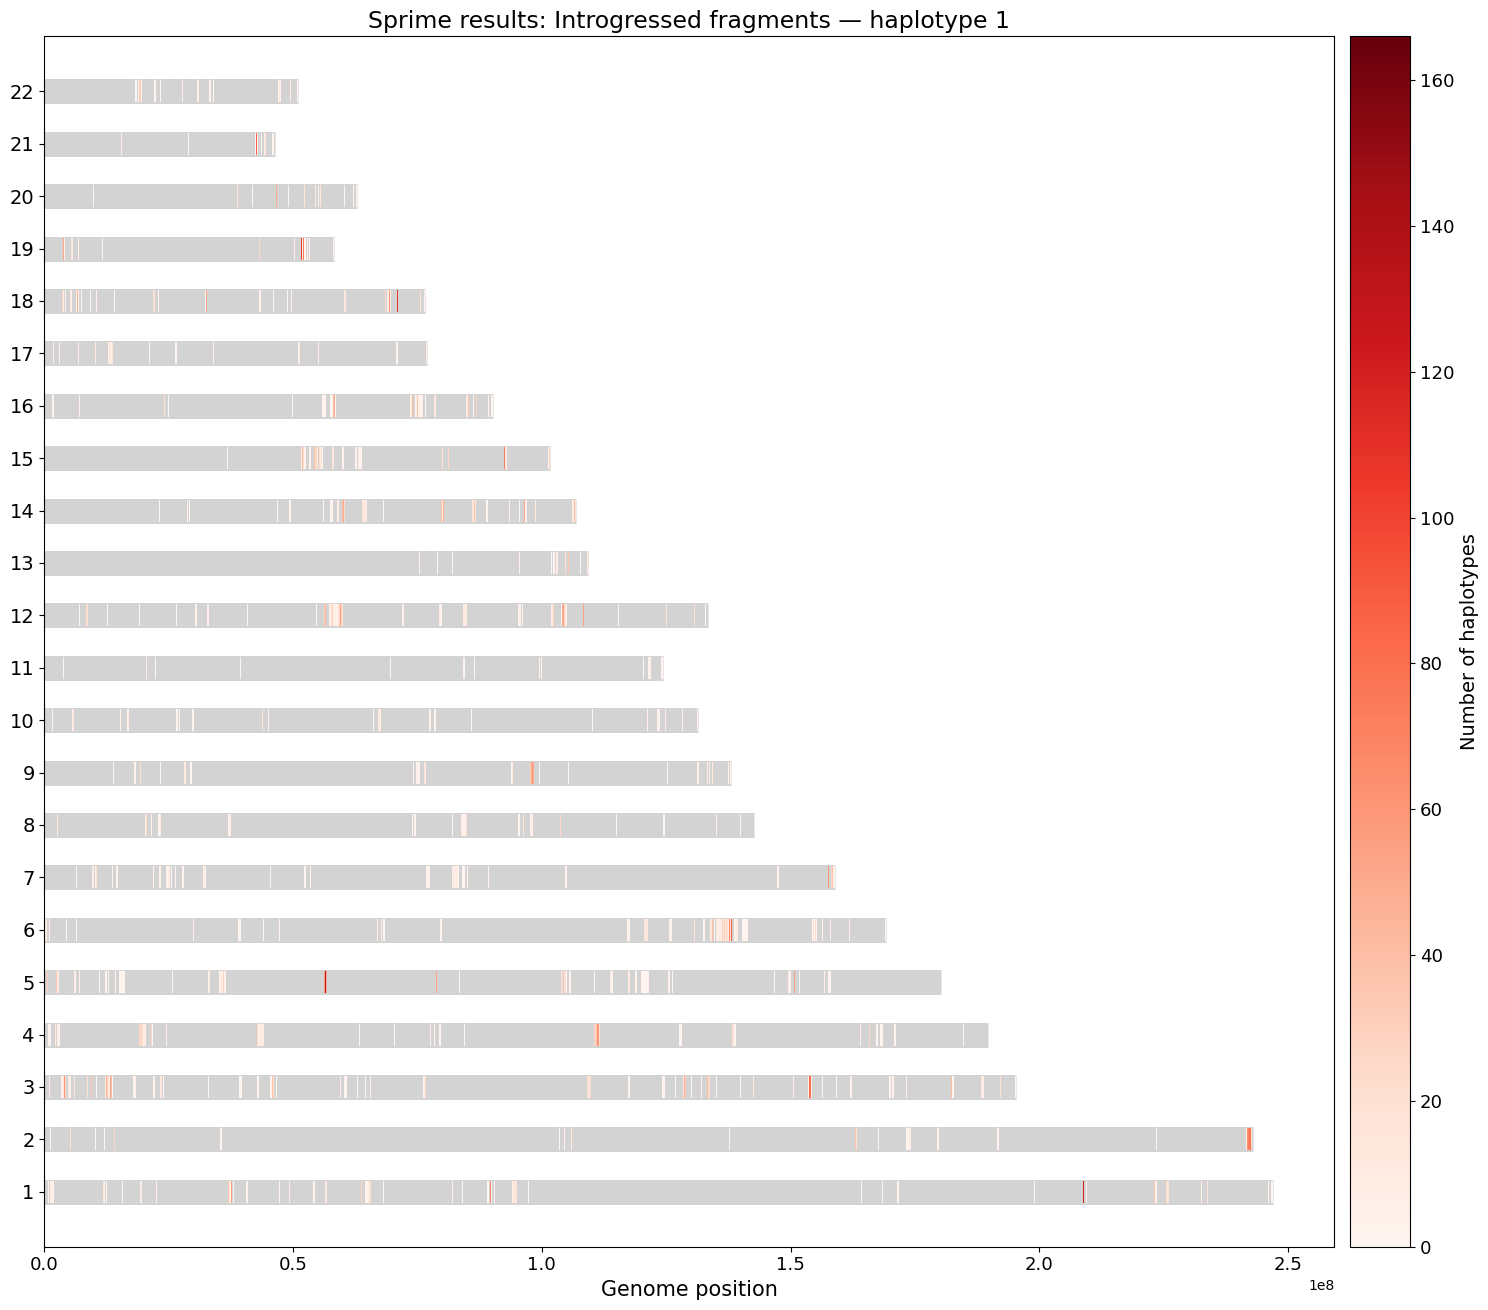

In [30]:
plot_introgression_support_exact(
    bed_df,
    chromosomes=None,
    count_mode="haplotype",  # "haplotype" or "individual"
    cmap="Reds",
    backbone_linewidth=18,
    vcf_file=vcf_file,
    haplotype=1,
    title="Sprime results: Introgressed fragments"
    #title="only hap 1"
)

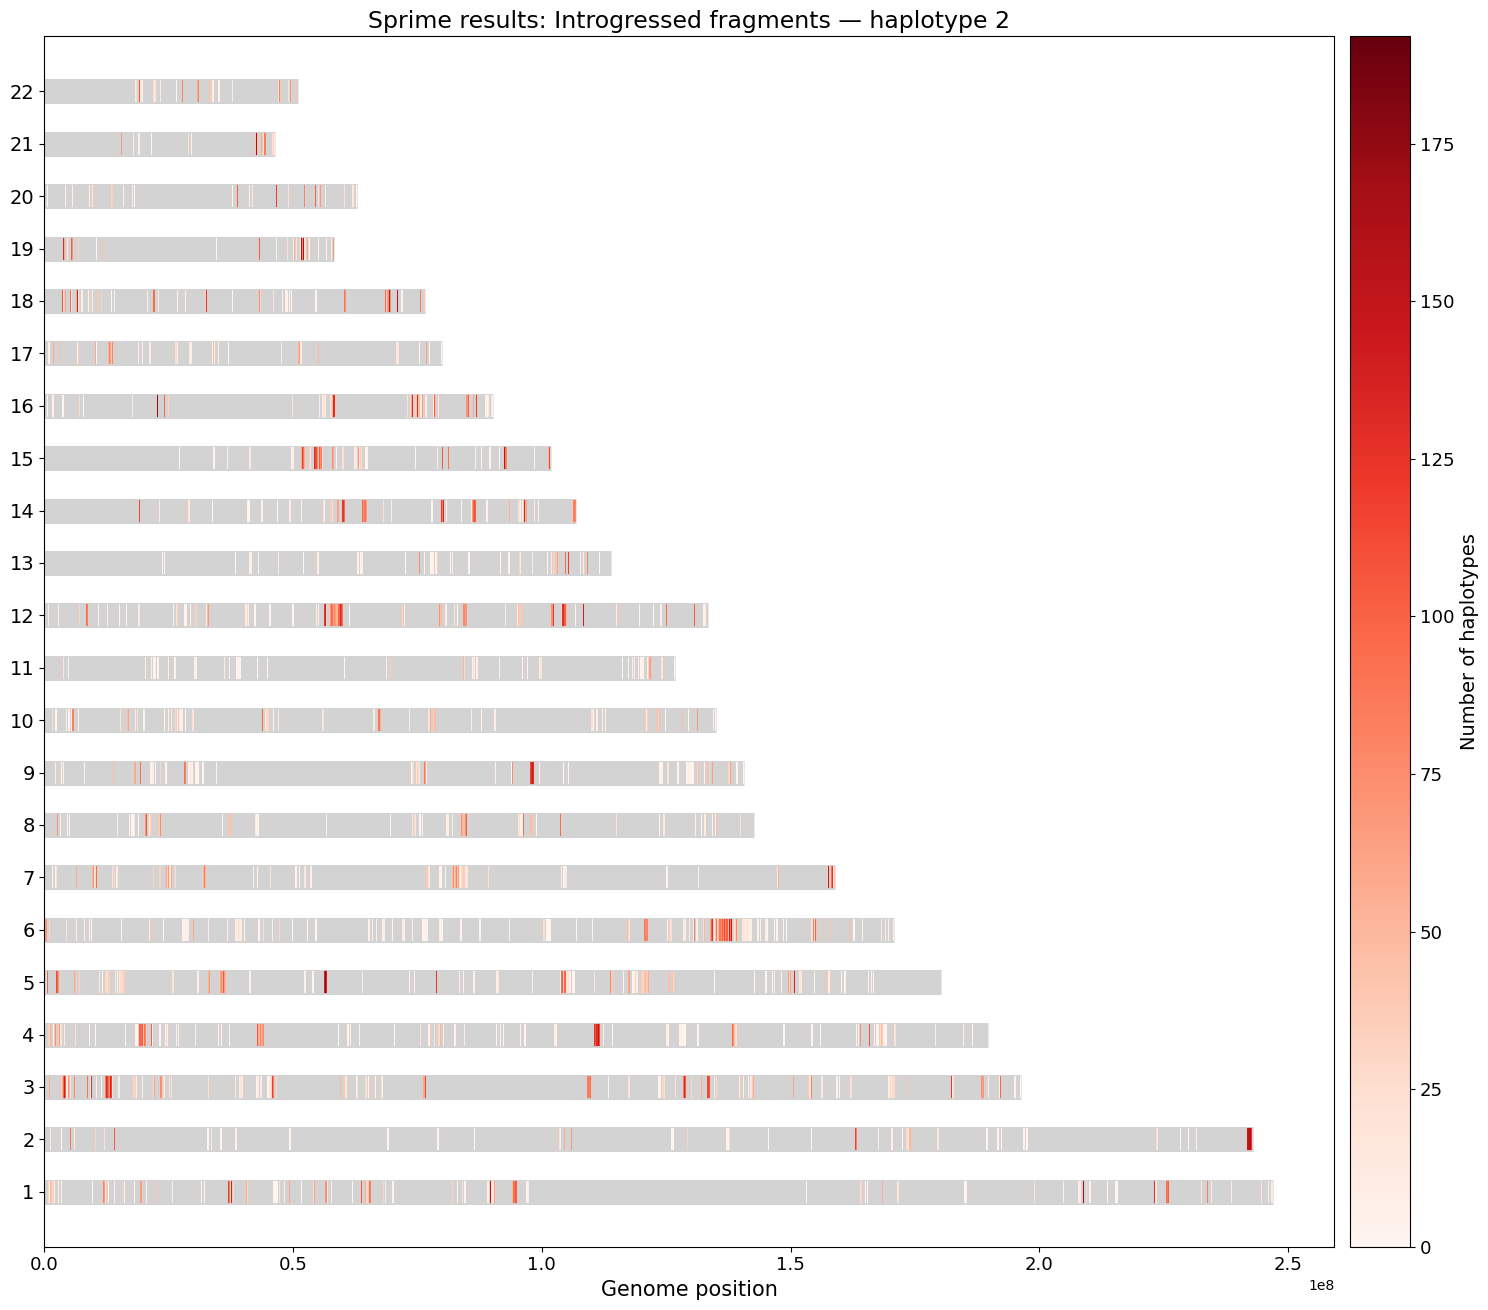

In [31]:
plot_introgression_support_exact(
    bed_df,
    chromosomes=None,
    count_mode="haplotype",  # "haplotype" or "individual"
    cmap="Reds",
    backbone_linewidth=18,
    vcf_file=vcf_file,
    haplotype=2,
    title="Sprime results: Introgressed fragments"
    #title="only hap 2"
)